# Contributors to this notebook

* Daniel Arribas-Bel [@darribas](http://twitter.com/darribas)
* Serge Rey http://sjrey.org

In [1]:
%matplotlib inline
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
from matplotlib.pyplot import *

# A brief introduction to PySAL, a library for spatial analysis

In this notebook, I will present the main functionality of the library `PySAL`. I will start with a bit of brackground and overview and then walk through the following sections:

* Data I/O: read and write shapefiles
* Shapefile visualization
* Spatial Weights
* Core functionality of `PySAL`
     * ESDA & spatial autocorrelation
     * Specific modules: `region`, `spreg`, `spatial_dynamics` and `inequality`
     * `contrib` module
* A sneak peak into the current and future plans

## Data I/O

One of the main advantages and contributions of PySAL is the easy interface it provides to ESRI shapefiles. The shapefile is the most common vector format of spatial data and it is widely used in applications in the social sciences because of the nature of the data at the disposal (areal or point typically).

For this example, we will use the shapefile `amsterdam_hoods.shp` from the `data` folder that contains the polygons of the different neighborhoods in Amsterdam. Along with the geometry of the polygons is a dbf that contains aggregated data for the checkins we have explored in the previous notebook.

### Shapefiles

`PySAL` has a very *pythonic* way of interacting with shapefiles, with an `open` command like the standard library:

In [2]:
shp_link = 'data/amsterdam_hoods.shp'
shp = ps.open(shp_link)
shp

Once open, we can get different attributes of the shapefile right away:

In [3]:
shp.header

{'BBOX Mmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Xmax': 5.06863004280464,
 'BBOX Xmin': 4.72926974364051,
 'BBOX Ymax': 52.43213807123786,
 'BBOX Ymin': 52.2794164487147,
 'BBOX Zmax': 0.0,
 'BBOX Zmin': 0.0,
 'File Code': 9994,
 'File Length': 29934,
 'Shape Type': 5,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'Version': 1000}

In [4]:
shp.bbox

[4.72926974364051, 52.2794164487147, 5.06863004280464, 52.43213807123786]

The object creates an iterator over the polygons that goes in the same order as the rows in the `dbf`. So you can iterate over the polygons to operate on them individually:

In [5]:
for poly in shp:
    print "Iterating over polygon: ", poly.id

Iterating over polygon:  1
Iterating over polygon:  2
Iterating over polygon:  3
Iterating over polygon:  4
Iterating over polygon:  5
Iterating over polygon:  6
Iterating over polygon:  7
Iterating over polygon:  8
Iterating over polygon:  9
Iterating over polygon:  10
Iterating over polygon:  11
Iterating over polygon:  12
Iterating over polygon:  13
Iterating over polygon:  14
Iterating over polygon:  15
Iterating over polygon:  16
Iterating over polygon:  17
Iterating over polygon:  18
Iterating over polygon:  19
Iterating over polygon:  20
Iterating over polygon:  21
Iterating over polygon:  22
Iterating over polygon:  23
Iterating over polygon:  24
Iterating over polygon:  25
Iterating over polygon:  26
Iterating over polygon:  27
Iterating over polygon:  28
Iterating over polygon:  29
Iterating over polygon:  30
Iterating over polygon:  31
Iterating over polygon:  32
Iterating over polygon:  33
Iterating over polygon:  34
Iterating over polygon:  35
Iterating over polygon:  36
I

Or, if the shapefile is not too big and your machine is generous in RAM, you can pack them all into a list:

In [6]:
polys = list(shp)
poly0 = shp[0]
poly0

Spend some time exploring the attributes of polygons:

In [7]:
# Note that this does not make much sense if the shapefile is not projected
poly0.area

5.3677530927880024e-05

In [8]:
poly0.centroid

(4.89742311742521, 52.37362424151918)

In [9]:
# Does not contain holes
poly0.holes

[[]]

In [10]:
poly0.perimeter

0.03272855678890349

In [11]:
poly0.vertices

[(4.895853931294426, 52.3685306056879),
 (4.895608395880829, 52.368579135637),
 (4.895069059784516, 52.36827136401666),
 (4.894453735047168, 52.36833356576813),
 (4.893137111197583, 52.369431533940286),
 (4.892812396329113, 52.37008523352424),
 (4.893413457272433, 52.373189498497105),
 (4.893267486971745, 52.373313473206),
 (4.893312858925569, 52.37373586490692),
 (4.89351432623952, 52.37421329026471),
 (4.89689279143361, 52.37673534321573),
 (4.897384789054209, 52.376512932627534),
 (4.899711293018493, 52.37820146422082),
 (4.901999584276892, 52.37830579506311),
 (4.903090918019509, 52.37809026749979),
 (4.90352016827385, 52.3777682040377),
 (4.903251031067214, 52.377410159801585),
 (4.90281504973314, 52.37723979098532),
 (4.901595851275064, 52.37519349037614),
 (4.901280145956854, 52.3745915200307),
 (4.901099875926198, 52.37416215032509),
 (4.9014017684343205, 52.37410802005844),
 (4.900795976616639, 52.37307474415859),
 (4.900225948282847, 52.37319945442478),
 (4.899076049145883, 5

If you want to write shapefiles, it is possible and equally simple. All you have to do is open a new file and create the appropriate specs:

In [12]:
shpo = ps.open('data/test.shp', 'w')
shpo.header = shp.header

Now assume you want to write only the first polygon:

In [13]:
shpo.write(poly0)
shpo.close()

### DBF files

As mentioned, along with the `.shp` object there is a `.dbf` file that contains attribute data for the polygons. You can easily access it and load it using `pysal` as well:

In [14]:
dbf = ps.open(shp_link.replace('.shp', '.dbf'))

Very much like with shapefiles, once it is loaded, you can access several aspects of it:

In [15]:
dbf.header

['h_0',
 'h_1',
 'h_10',
 'h_11',
 'h_12',
 'h_13',
 'h_14',
 'h_15',
 'h_16',
 'h_17',
 'h_18',
 'h_19',
 'h_2',
 'h_20',
 'h_21',
 'h_22',
 'h_23',
 'h_3',
 'h_4',
 'h_5',
 'h_6',
 'h_7',
 'h_8',
 'h_9',
 'total',
 'total_rando',
 'venues',
 'buurt']

In [16]:
dbf.field_spec

[('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('N', 36, 15),
 ('C', 14, 0)]

In [17]:
# Pull out collumn "total"
total = dbf.by_col("total")
total

[2750.0,
 6620.0,
 2521.0,
 3468.0,
 2076.0,
 1434.0,
 2385.0,
 4209.0,
 1211.0,
 988.0,
 554.0,
 2019.0,
 241.0,
 1228.0,
 1330.0,
 424.0,
 222.0,
 315.0,
 134.0,
 672.0,
 289.0,
 498.0,
 539.0,
 420.0,
 218.0,
 2157.0,
 144.0,
 739.0,
 208.0,
 55.0,
 660.0,
 201.0,
 455.0,
 293.0,
 100.0,
 299.0,
 148.0,
 108.0,
 163.0,
 10.0,
 5.0,
 28.0,
 44.0,
 62.0,
 62.0,
 36.0,
 163.0,
 64.0,
 1199.0,
 136.0,
 41.0,
 54.0,
 76.0,
 151.0,
 125.0,
 23.0,
 38.0,
 501.0,
 369.0,
 72.0,
 355.0,
 1149.0,
 369.0,
 665.0,
 872.0,
 4008.0,
 1231.0,
 237.0,
 203.0,
 914.0,
 46.0,
 7.0,
 1191.0,
 535.0,
 895.0,
 380.0,
 1874.0,
 1477.0,
 88.0,
 971.0,
 1690.0,
 914.0,
 262.0,
 400.0,
 287.0,
 509.0,
 2811.0,
 897.0,
 428.0,
 190.0,
 1367.0,
 431.0,
 483.0,
 543.0,
 2179.0,
 815.0]

Pulling out columns results in a Python list, which may not be the most efficient data structure to store and operate on the data. It is preferable to convert it into a numpy array. You can do this for instance to pull automatically all the columns in the header:

In [18]:
cols = np.array([dbf.by_col(col) for col in dbf.header]).T
cols

array([['30.0', '12.0', '136.0', ..., '483.0', '95.0', 'BU03630000'],
       ['54.0', '34.0', '339.0', ..., '88.0', '116.0', 'BU03630001'],
       ['18.0', '10.0', '132.0', ..., '815.0', '68.0', 'BU03630002'],
       ..., 
       ['2.0', '0.0', '42.0', ..., '420.0', '10.0', 'BU03631459'],
       ['0.0', '0.0', '149.0', ..., '1477.0', '24.0', 'BU03631490'],
       ['3.0', '1.0', '43.0', ..., '739.0', '7.0', 'BU03631491']], 
      dtype='|S32')

Note that, because arrays only allow for one data type, all the columns are coerced into strings (the neighbohood names cannot be understood as numbers). We can extract all the columns whose data type is not a string. This requires some Python foo, but it's possible in a single line:

In [19]:
numeric_cols = np.array([dbf.by_col(dbf.header[i]) for i in range(len(dbf.header)) if dbf.field_spec[i][0] == 'N']).T
numeric_cols

array([[  3.00000000e+01,   1.20000000e+01,   1.36000000e+02, ...,
          2.75000000e+03,   4.83000000e+02,   9.50000000e+01],
       [  5.40000000e+01,   3.40000000e+01,   3.39000000e+02, ...,
          6.62000000e+03,   8.80000000e+01,   1.16000000e+02],
       [  1.80000000e+01,   1.00000000e+01,   1.32000000e+02, ...,
          2.52100000e+03,   8.15000000e+02,   6.80000000e+01],
       ..., 
       [  2.00000000e+00,   0.00000000e+00,   4.20000000e+01, ...,
          5.43000000e+02,   4.20000000e+02,   1.00000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   1.49000000e+02, ...,
          2.17900000e+03,   1.47700000e+03,   2.40000000e+01],
       [  3.00000000e+00,   1.00000000e+00,   4.30000000e+01, ...,
          8.15000000e+02,   7.39000000e+02,   7.00000000e+00]])

However, it would be very nice if you could pull everything into one single object that contained all the information properly. This is a perfect task for a `pandas.Dataframe`. We will take advantage of the fact that you can create them from a dictionary where the key is the column name and the value is the column itself in a numpy array:

In [20]:
d = dict([(col, np.array(dbf.by_col(col))) for col in dbf.header])
df = pd.DataFrame(d)
df

,buurt,h_0,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,...,h_3,h_4,h_5,h_6,h_7,h_8,h_9,total,total_rando,venues
0,BU03630000,30,12,136,155,163,149,195,193,234,...,9,3,11,48,90,117,111,2750,483,95
1,BU03630001,54,34,339,380,375,402,393,497,603,...,15,32,117,287,372,324,292,6620,88,116
2,BU03630002,18,10,132,181,170,177,145,147,176,...,1,5,8,35,132,105,95,2521,815,68
3,BU03630003,48,30,162,251,205,221,197,237,301,...,7,4,8,41,102,127,119,3468,100,81
4,BU03630004,10,3,139,185,155,129,125,152,156,...,2,7,9,46,78,111,116,2076,535,41
5,BU03630005,5,23,63,66,69,68,60,69,90,...,9,15,27,74,76,78,74,1434,914,10
6,BU03630006,26,22,132,111,131,117,126,126,164,...,0,1,8,36,90,93,63,2385,218,61
7,BU03630007,81,33,176,229,183,276,276,240,283,...,7,17,31,97,273,226,187,4209,144,101
8,BU03630008,3,5,79,78,89,103,84,72,76,...,0,1,8,33,67,79,78,1211,1367,34
9,BU03630009,6,1,56,87,69,66,72,60,65,...,0,0,8,32,108,83,40,988,315,10


Note that the columns are ordered alphabetially. If we wanted to get the original order:

In [21]:
df = df[dbf.header]
df

,h_0,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,...,h_4,h_5,h_6,h_7,h_8,h_9,total,total_rando,venues,buurt
0,30,12,136,155,163,149,195,193,234,253,...,3,11,48,90,117,111,2750,483,95,BU03630000
1,54,34,339,380,375,402,393,497,603,513,...,32,117,287,372,324,292,6620,88,116,BU03630001
2,18,10,132,181,170,177,145,147,176,241,...,5,8,35,132,105,95,2521,815,68,BU03630002
3,48,30,162,251,205,221,197,237,301,302,...,4,8,41,102,127,119,3468,100,81,BU03630003
4,10,3,139,185,155,129,125,152,156,159,...,7,9,46,78,111,116,2076,535,41,BU03630004
5,5,23,63,66,69,68,60,69,90,139,...,15,27,74,76,78,74,1434,914,10,BU03630005
6,26,22,132,111,131,117,126,126,164,236,...,1,8,36,90,93,63,2385,218,61,BU03630006
7,81,33,176,229,183,276,276,240,283,260,...,17,31,97,273,226,187,4209,144,101,BU03630007
8,3,5,79,78,89,103,84,72,76,87,...,1,8,33,67,79,78,1211,1367,34,BU03630008
9,6,1,56,87,69,66,72,60,65,55,...,0,8,32,108,83,40,988,315,10,BU03630009


In [22]:
df.describe().T # Use .T to transpose the DataFrame and allow it to fit on screen

,count,mean,std,min,25%,50%,75%,max
h_0,96,8.104167,14.072354,0,0.75,2.0,6.00,81
h_1,96,4.822917,8.776757,0,0.00,1.0,4.25,51
h_10,96,43.375000,56.858874,0,6.00,22.5,56.50,339
h_11,96,48.781250,65.720333,0,9.75,21.0,56.25,380
h_12,96,44.625000,61.220267,0,7.75,20.0,56.75,375
h_13,96,44.239583,64.715205,0,7.75,17.5,50.25,402
h_14,96,46.104167,66.630083,0,7.00,20.0,60.25,393
h_15,96,49.458333,72.998330,0,7.00,21.0,60.25,497
h_16,96,55.718750,85.670569,0,9.75,24.5,69.25,603
h_17,96,59.229167,84.347212,0,11.00,31.5,59.25,513


Similarly as before, writing dbf files is no problem. Create a new output file, setup the right specifications, and write the records. For the sake of the example, we will write to a new `.dbf` the record of the first polygon, so we complete the example started with the shapefile.

In [23]:
dbfo = ps.open('data/test.dbf', 'w')
dbfo.header = dbf.header
dbfo.field_spec = dbf.field_spec
# Records need to be in a Python list
rec = list(df.ix[0].values)
dbfo.write(rec)
# Don't forget to close the file, the data is written at that moment!!!
dbfo.close()

## Shapefile visualization

Although still experimental and very rough on the edges, `PySAL` provides a module to visualize shapefiles. This is very clean and lean and, unlike other options such as `Basemap`, does not depend on difficult to install third party libraries. The code is in the `viz` module, part of `contrib`, the sandbox and interface with third party libraries layer for PySAL.

Eventually, there will be two tiers of the API: a low-level one that translates a shapefile object into one that is Matplotlib-compatible but that does not produce any map right away (very flexible); and a high-level one that presents canned versions of very common plots (a-la `pandas`).

Let's begin with a quick and dirty visualization of the polygons:

In [24]:
from pysal.contrib.viz import mapping as viz

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


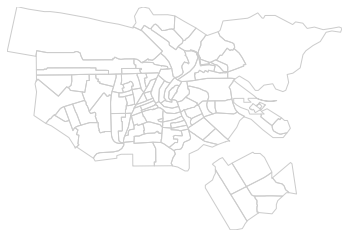

In [25]:
viz.plot_poly_lines(shp_link)

For the sake of pedagogy, let's create a similar plot using the low-level interface:

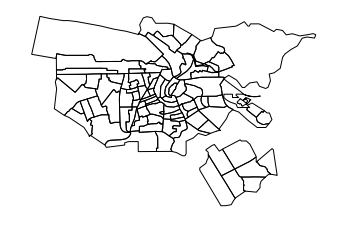

In [30]:
f = figure()
ax = f.add_subplot(111)
poly_collection = viz.map_poly_shp(ps.open(shp_link))
poly_collection.set_facecolor('none')
ax.add_collection(poly_collection)
ax.autoscale_view()
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
show()

An advantage of the latter is that it gives you much more flexibility to for example, add in an extra layer on the plot. Let's bring back the checkins from the previous notebook and overlay them on the figure (we will create a larger one to be able to see through):

In [31]:
db = pd.read_csv('http://ubuntuone.com/4oIpVJDCpdREhzNdSRwMx8')

f = figure(figsize=(12, 12))
ax = f.add_subplot(111)
poly_collection = viz.map_poly_shp(shp_link)
poly_collection.set_facecolor('none')
ax.add_collection(poly_collection)
ax.autoscale_view()
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
scatter(db['lon'].values, db['lat'].values, marker='.', alpha=0.5, s=2.5)
title("Spatial distribution of checkins in Amsterdam")
show()

CParserError: Error tokenizing data. C error: Expected 1 fields in line 107, saw 2
